## Problem 1

In [1]:
import numpy as np

## (a)

In [2]:
X = np.mat([[-1,-1],[-1,1],[1,-1],[1,1]])
X

matrix([[-1, -1],
        [-1,  1],
        [ 1, -1],
        [ 1,  1]])

In [3]:
def fi(x):
    return np.mat([[1,x[0,0]**2,x[0,1]**2,np.sqrt(2)*x[0,0],np.sqrt(2)*x[0,1],np.sqrt(2)*x[0,0]*x[0,1]]])

In [4]:
FI = np.zeros([4,6])
for i in range(X.shape[0]):
    FI[i,:] = fi(X[i,:])
FI

array([[ 1.        ,  1.        ,  1.        , -1.41421356, -1.41421356,
         1.41421356],
       [ 1.        ,  1.        ,  1.        , -1.41421356,  1.41421356,
        -1.41421356],
       [ 1.        ,  1.        ,  1.        ,  1.41421356, -1.41421356,
        -1.41421356],
       [ 1.        ,  1.        ,  1.        ,  1.41421356,  1.41421356,
         1.41421356]])

In [5]:
K = FI.dot(FI.T)
K

array([[9., 1., 1., 1.],
       [1., 9., 1., 1.],
       [1., 1., 9., 1.],
       [1., 1., 1., 9.]])

## (b)

In [6]:
y = np.mat([[-1],[1],[1],[-1]])
y

matrix([[-1],
        [ 1],
        [ 1],
        [-1]])

In [7]:
K = np.zeros([4,4])
for i in range(4):
    for j in range(4):
        K[i,j] = (1+X[i,:].dot(X[j,:].T))**2
K

array([[9., 1., 1., 1.],
       [1., 9., 1., 1.],
       [1., 1., 9., 1.],
       [1., 1., 1., 9.]])

## (c)

In [8]:
f = y/8
w = FI.T.dot(f)
w

matrix([[ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ],
        [-0.70710678]])

In [9]:
K = np.zeros([4,1])
y = np.mat([[0.7,-0.2]])
for i in range(X.shape[0]):
    K[i,0] = (1+X[i,:].dot(y.T))**2
K.T.dot(f)

matrix([[0.14]])

## Problem 2

#SVM Demo
We use LibSVM programs to perform pattern classification using the iris dataset.

In [18]:
import pandas as pd

# Load Data
tmp = pd.read_csv('iris.csv',header=None).to_numpy()
X = tmp[:,2:4]

In [19]:
y = (tmp[:,4] == 2).astype('float')
K = X.shape[0]
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
from sklearn import svm
## Fit an SVM classifier. We can specify the 

clf = svm.SVC(kernel='rbf',C=0.25)
clf.fit(X, y)

SVC(C=0.25)

In [26]:
# We now explore a bit about the model
i0 = clf.support_          # indices of support vectors
nsv = clf.n_support_       # number of support vectors in class 0 and class 1
sv = clf.support_vectors_  # Support Vectors
f = clf.dual_coef_        # this is the vector f = alpha.*d


print("Number of Support Vectors for each class: " + str(nsv))
print("Chosen Support Vectors: \n" + str(sv))
print("Index of chosen Support Vectors: " + str(i0))
print("Labels of Support Vectors: " + str(y[i0]))
print("f: " + str(f))

Number of Support Vectors for each class: [34 34]
Chosen Support Vectors: 
[[1.7 0.4]
 [1.7 0.3]
 [1.7 0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [5.1 1.9]
 [5.6 1.8]
 [4.5 1.7]
 [5.1 2. ]
 [5.3 1.9]
 [5.5 2.1]
 [5.  2. ]
 [5.1 2.4]
 [5.3 2.3]
 [5.5 1.8]
 [5.  1.5]
 [4.9 2. ]
 [4.9 1.8]
 [4.8 1.8]
 [4.9 1.8]
 [5.8 1.6]
 [5.1 1.5]
 [5.6 1.4]
 [5.5 1.8]
 [4.8 1.8]
 [5.4 2.1]
 [5.1 2.3]
 [5.1 1.9]
 [5.2 2.3]
 [5.  1.9]
 [5.2 2. ]
 [5.1 1.8]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [4.2 1.5]
 [4.7 1.4]
 [4.4 1.4]
 [4.5 1.5]
 [4.5 1.5]
 [4.8 1.8]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.4 1.2]
 [4.6 1.4]
 [3.3 1. ]
 [4.2 1.3]
 [4.2 1.3]
 [4.3 1.3]
 [3.  1.1]
 [4.1 1.3]]
Index of chosen Support Vectors: [  5  18  20  23  24  43  44 101 103 106 110 111 112 113 114 115 116 119
 121 123 126 127 129 133 134 137 138 139 141 142 145 146 147 149  50  

In [27]:
## Compute hyper-plane parameters
w = np.dot(sv.T, f.T)   # Note we need to transpose f as it is stored as a row vector not a column vector
b = clf.intercept_

print("w: \n" + str(w))
print("b: " + str(b))

w: 
[[-0.45146835]
 [-1.66525633]]
b: [-0.9594184]


In [28]:
## We can test the accuracy of the model using predict
# Perform estimation based on the data
yhat = clf.predict(X)

#Compute Accuracy
Acc = 1- np.sum(np.abs(yhat - y))/K
print("Accuracy: " + str(100*Acc) + "%")

Accuracy: 96.0%


Finally we can display our decision boundary. We plot the decision boundary, margins, and highlight the support vectors.

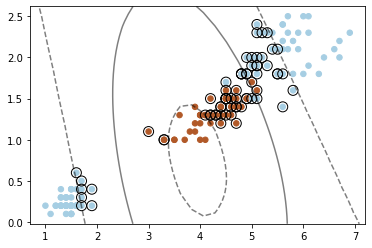

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()